***TASK_1: IMPLEMENT A BASIC LINEAR REGRESSION MODEL FROM SCRATCH USING NUMPY. FIT THE MODEL TO A SIMPLE DATASET AND PLOT THE REGRESSION LINE.***

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Optimal intercept: 4.186799174312735
Optimal gradient/slope: 2.99983630495613


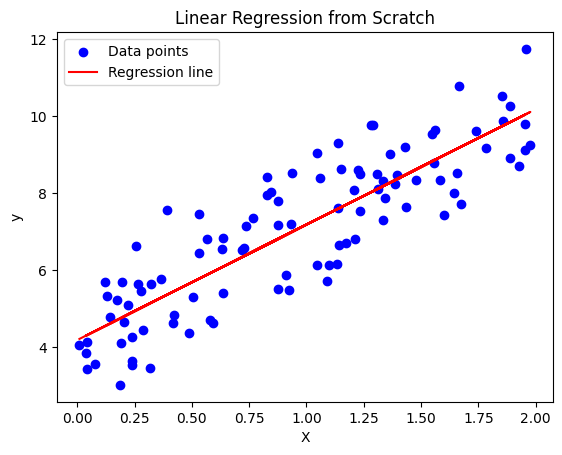

In [5]:
# Generate a simple dataset
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relation with noise

# Initialize parameters
intercept = 0
gradient = 0
learning_rate = 0.01
n_iterations = 1000
m = len(y)  # Number of data points

# Gradient Descent
for iteration in range(n_iterations):
    predictions = intercept + gradient * X
    errors = predictions - y
    intercept_theta_0 = (2 / m) * np.sum(errors)
    gradient_theta_1 = (2 / m) * np.sum(errors * X)
    intercept -= learning_rate * intercept_theta_0
    gradient -= learning_rate * gradient_theta_1

# Final parameters
print(f"Optimal intercept: {intercept}")
print(f"Optimal gradient/slope: {gradient}")

# Plot the results
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, intercept + gradient * X, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression from Scratch')
plt.legend()
plt.show()


***TASK_2: PERFORM DATA CLEANING ON A REAL-WORLD DATASET. HANDLE MISSING VALUES, DETECT AND REMOVE OUTLIERS, AND 
NORMALIZE/STANDARDIZE THE DATA USING PANDAS.***

In [2]:
df=pd.read_csv(r'C:\Users\Student\Downloads\Life Expectancy Data.csv',encoding='unicode_escape')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
#to check the percentage of missing values in each columns
df.isnull().sum()/df.shape[0]*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [7]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

***HANDLING MISSING DATA***

In [3]:
# For numeric data i have filled missing values with either mean having symmetric data or median having significant outliers
#  and for categorical data i have filled missing values with mode
for i in ['Life expectancy ','Adult Mortality','Schooling',"Total expenditure","Population"]:
    df[i].fillna(df[i].mean(),inplace=True)
df['Diphtheria '].fillna(df['Diphtheria '].mode()[0], inplace=True)
for i in [" BMI ","GDP","Polio","Alcohol","Income composition of resources","Hepatitis B", " thinness 5-9 years"," thinness  1-19 years"]:
    df[i].fillna(df[i].median(),inplace=True)
df.isnull().sum()

C:\Users\Student\AppData\Local\Temp\ipykernel_8848\2089841927.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(),inplace=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_8848\2089841927.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

***OUTLIERS DETECTION AND REMOVAL***

In [4]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
columns_to_check = ['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio',
    'Total expenditure', 'Diphtheria ', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years',
    'Income composition of resources']
# Remove outliers using IQR method
df_cleaned_iqr = remove_outliers_iqr(df, columns_to_check)



In [14]:
df_cleaned_iqr.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1.578000e+03,1578.000000,1578.000000,1578.000000,1578.000000
mean,2008.275665,71.161074,146.475650,14.454373,4.778270,250.278311,91.850444,1548.115336,41.606971,18.849176,92.422687,5.956579,92.529785,0.955133,3035.895351,1.031012e+07,3.850380,3.872624,0.682067,12.613263
std,4.497099,7.211456,94.236568,37.298528,3.884432,378.644017,7.140705,9017.416836,18.956159,46.996243,7.231434,1.947805,6.791444,3.155441,3252.704586,2.281769e+07,2.677093,2.712032,0.125514,2.438579
min,2000.000000,45.500000,1.000000,0.000000,0.010000,0.000000,64.000000,0.000000,2.000000,0.000000,65.000000,0.740000,73.000000,0.100000,5.668726,1.230000e+02,0.100000,0.100000,0.343000,5.000000
25%,2005.000000,67.500000,78.000000,0.000000,1.352500,3.211569,89.000000,0.000000,25.625000,0.000000,89.000000,4.720000,89.000000,0.100000,748.764834,4.556938e+05,1.800000,1.700000,0.620000,11.300000
50%,2009.000000,73.000000,141.000000,2.000000,3.755000,77.183217,94.000000,4.000000,47.650000,3.000000,95.000000,5.938190,95.000000,0.100000,1766.947595,3.720414e+06,3.000000,3.100000,0.700000,12.600000
75%,2012.000000,75.400000,193.000000,11.750000,7.427500,347.518070,97.000000,127.750000,56.700000,14.000000,98.000000,7.117500,98.000000,0.300000,4131.756286,1.275338e+07,6.075000,6.100000,0.765000,14.200000
max,2015.000000,89.000000,454.000000,457.000000,16.990000,2429.854745,99.000000,133802.000000,87.300000,558.000000,99.000000,11.790000,99.000000,50.300000,14726.318280,2.488832e+08,12.600000,12.600000,0.948000,20.700000


In [15]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,42.035739,82.617767,5.938190,82.431926,1.742103,6611.523863,1.275338e+07,4.821886,4.852144,0.630362,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,160.445548,23.367166,2.400274,23.677846,5.077785,13296.603449,5.381546e+07,4.397621,4.485854,0.205140,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.938190,93.000000,0.100000,1766.947595,3.675929e+06,3.300000,3.300000,0.677000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


***a significant difference in statistics like mean, median, and quartiles can be seen in before and after outliers removing***

****STANDARDIZING DATA****

In [6]:
#excluding the object datatype columns 
df_excluded = df_cleaned_iqr.select_dtypes(exclude=['object'])

mean = df_excluded.mean()
std = df_excluded.std()

# Standardize the dataset
df_standardized = (df_excluded - mean) / std
#print(df_standardized)
df_standardized.head()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
16,1.495261,0.920608,-0.769082,-0.387532,-0.045893,0.302915,1.001240,-0.171681,0.864786,-0.401078,0.909545,0.022292,0.952701,-0.271003,0.282329,-0.450582,-0.990022,-0.948596,0.636846,0.650681
17,1.272895,0.879008,-1.469447,-0.387532,-0.069063,0.471342,0.861197,-0.171681,0.822584,-0.379800,0.771260,-0.039315,0.805457,-0.271003,0.473412,-0.439186,-0.990022,-0.948596,0.628879,0.650681
18,1.050529,0.837407,-0.662966,-0.387532,-0.004703,0.476962,1.001240,-0.171681,0.785656,-0.379800,0.909545,-0.152263,0.952701,-0.271003,0.423902,-0.439156,-0.952668,-0.911724,0.612945,0.650681
19,0.828164,0.795807,-0.641743,-0.387532,0.093123,0.428278,1.001240,-0.170683,0.748729,-0.379800,0.909545,-0.188201,0.952701,-0.271003,0.372527,-0.451719,-0.952668,-0.911724,0.557174,0.650681
20,0.605798,0.754206,-0.620520,-0.387532,0.152334,0.493297,1.001240,-0.168575,0.711802,-0.379800,0.909545,-0.126593,0.952701,-0.271003,0.430806,-0.438910,-0.915314,-0.874851,0.445632,0.281613


**TASK 3: IMPLEMENT FEATURE SELECTION USING CORRELATION MATRIX AND MUTUAL INFORMATION. VISUALIZE THE IMPORTANT FEATURES.**

In [56]:
df1=df.loc[:,~df.columns.isin(['Country','Status','Year'])]
df1.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


***TASK_3: IMPLEMENTATION OF CORRELATION MATRIX AND MUTUAL INFORMATION ALONG WITH VISUALIZING IMPORTANT FEATURES***

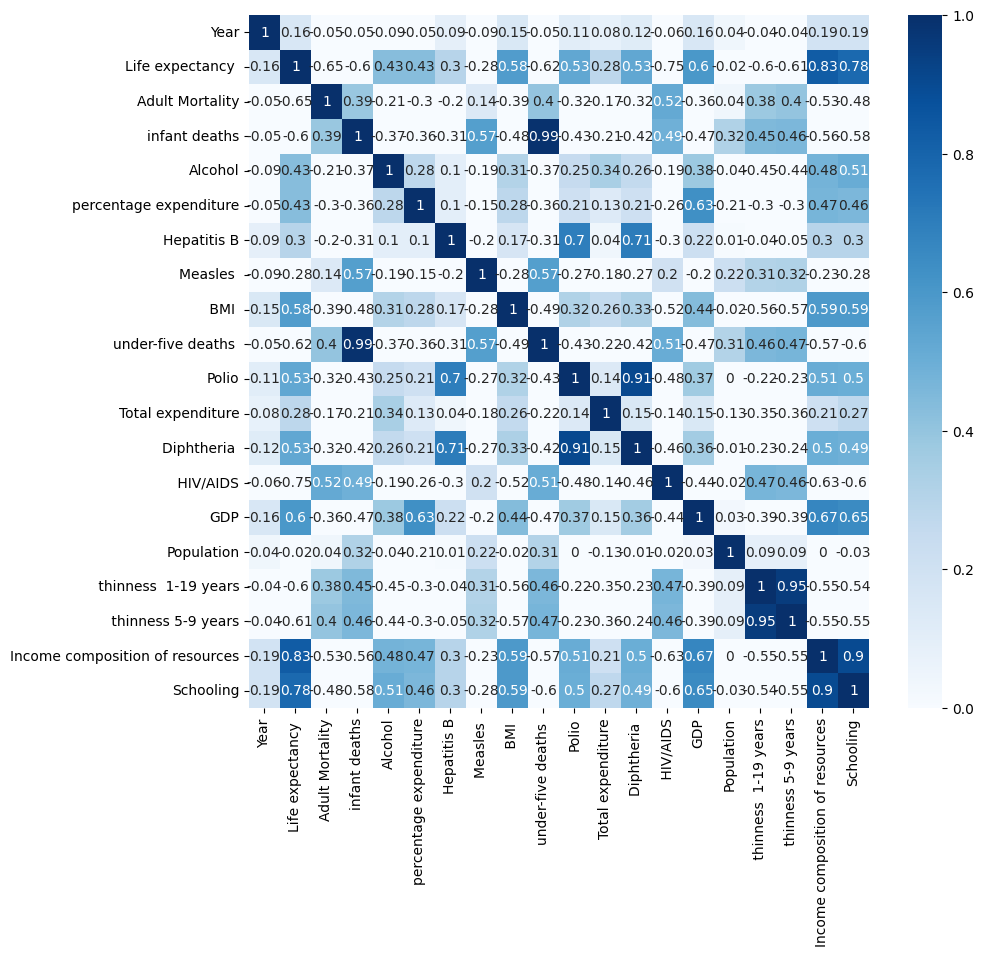

In [39]:
my_matrix = df1.corr(method='spearman').round(2)
plt.figure(figsize=(10,9))
sns.heatmap(my_matrix, cmap='Blues',vmin=0,vmax=1,annot=True)
plt.show()

In [57]:
target_correlations = my_matrix['Life expectancy '].abs().sort_values(ascending=False)
important_features = target_correlations[target_correlations > 0.5].index.tolist()
important_features.remove('Life expectancy ')
print(target_correlations)


Life expectancy                    1.00
Income composition of resources    0.83
Schooling                          0.78
 HIV/AIDS                          0.75
Adult Mortality                    0.65
under-five deaths                  0.62
 thinness 5-9 years                0.61
infant deaths                      0.60
 thinness  1-19 years              0.60
GDP                                0.60
 BMI                               0.58
Diphtheria                         0.53
Polio                              0.53
percentage expenditure             0.43
Alcohol                            0.43
Hepatitis B                        0.30
Total expenditure                  0.28
Measles                            0.28
Year                               0.16
Population                         0.02
Name: Life expectancy , dtype: float64


C:\Users\Student\AppData\Local\Temp\ipykernel_9328\370211265.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=important_correlations.values, y=important_correlations.index, palette='viridis')


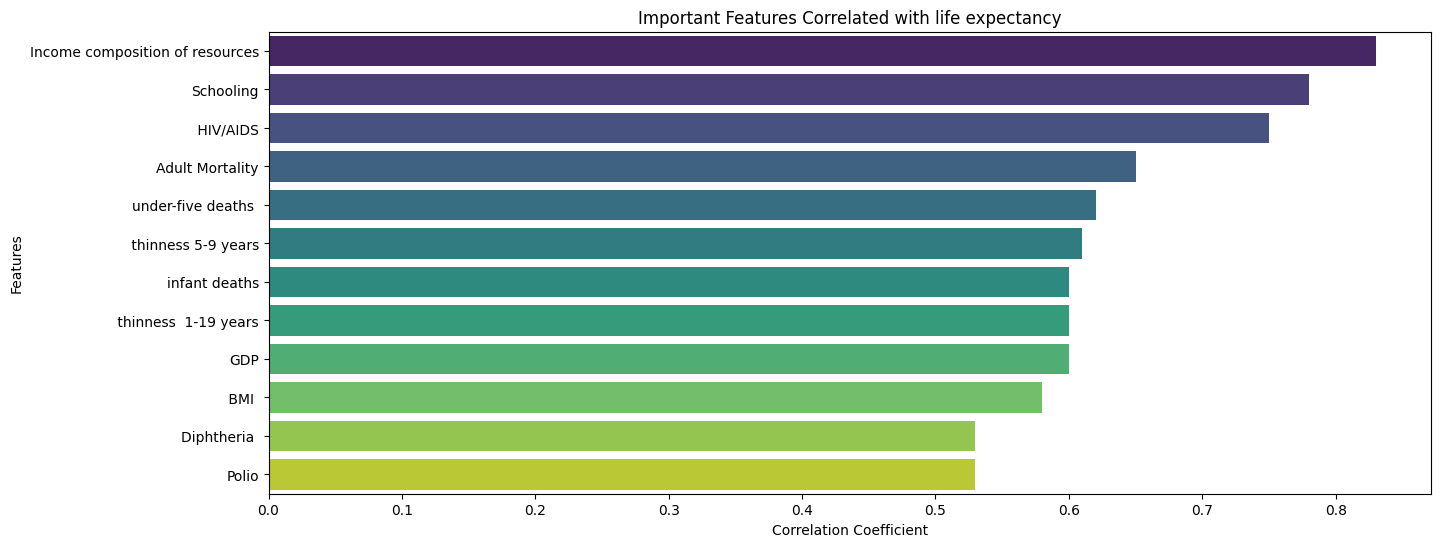

In [54]:
important_correlations = target_correlations[important_features]
plt.figure(figsize=(15, 6))
sns.barplot(x=important_correlations.values, y=important_correlations.index, palette='viridis')

# Add titles and labels
plt.title('Important Features Correlated with life expectancy')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [67]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
target ='Life expectancy '
X = df1.drop(columns=[target])
y = df1[target]
mi = mutual_info_regression(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})

# Sort the DataFrame by MI scores in descending order
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
print(mi_df)
important_features = mi_df[mi_df['Mutual Information'] > 0.1]
print("Important features:", important_features['Feature'].tolist())

                            Feature  Mutual Information
0                   Adult Mortality            1.284583
16  Income composition of resources            0.918076
15               thinness 5-9 years            0.779937
14             thinness  1-19 years            0.776943
17                        Schooling            0.697188
6                              BMI             0.573515
11                         HIV/AIDS            0.529383
7                under-five deaths             0.423923
1                     infant deaths            0.420217
12                              GDP            0.348988
2                           Alcohol            0.343591
8                             Polio            0.313508
10                      Diphtheria             0.292768
3            percentage expenditure            0.292237
9                 Total expenditure            0.253633
4                       Hepatitis B            0.191311
13                       Population            0

C:\Users\Student\AppData\Local\Temp\ipykernel_9328\3752965616.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mutual Information', y='Feature', data=important_features, palette='viridis')


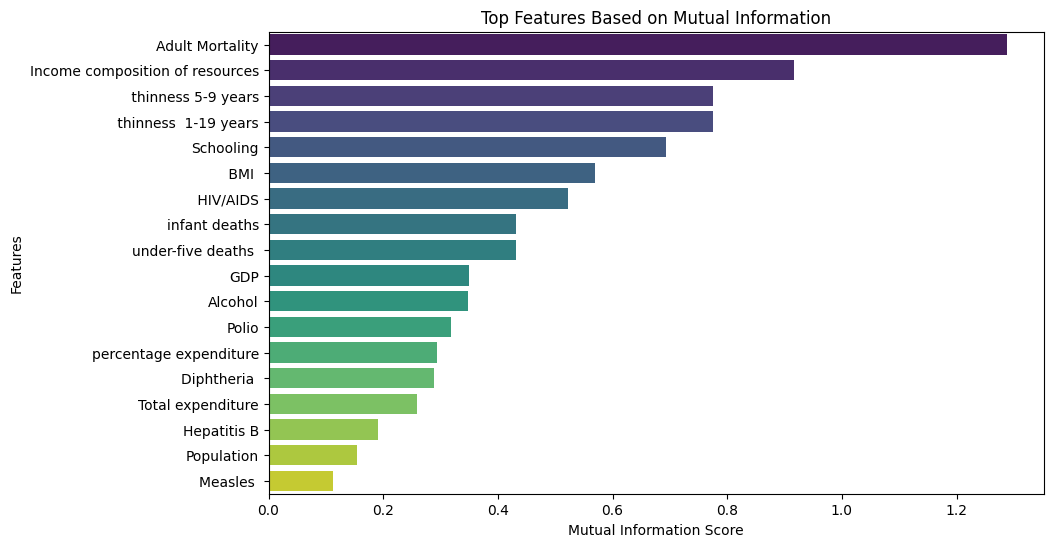

In [66]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information', y='Feature', data=important_features, palette='viridis')

# Add titles and labels
plt.title('Top Features Based on Mutual Information')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.show()

**TASK 4: CONDUCT EXPLORATOY DATA ANALYSIS (EDA) ON A DATASET.
GENERATE INSIGHTFUL VISUALIZATION USING MATPLOTLIB AND SEABORN.**


In [8]:
df.columns


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

***What is the distribution of life expectancy across developing and developed countries?***

<Axes: xlabel='Life expectancy ', ylabel='Count'>

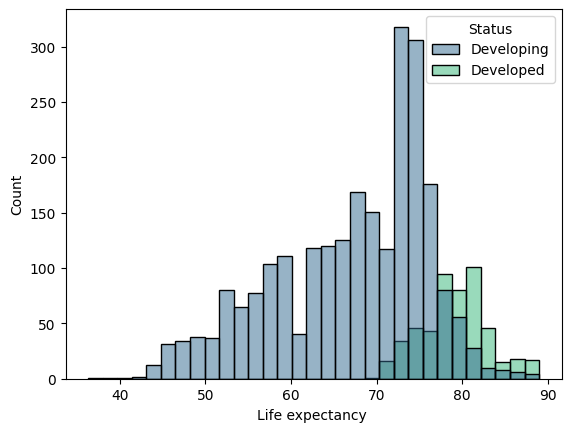

In [58]:
sns.histplot(x='Life expectancy ',data=df, hue='Status', palette='viridis')

***How does life expectancy vary with GDP and schooling?***

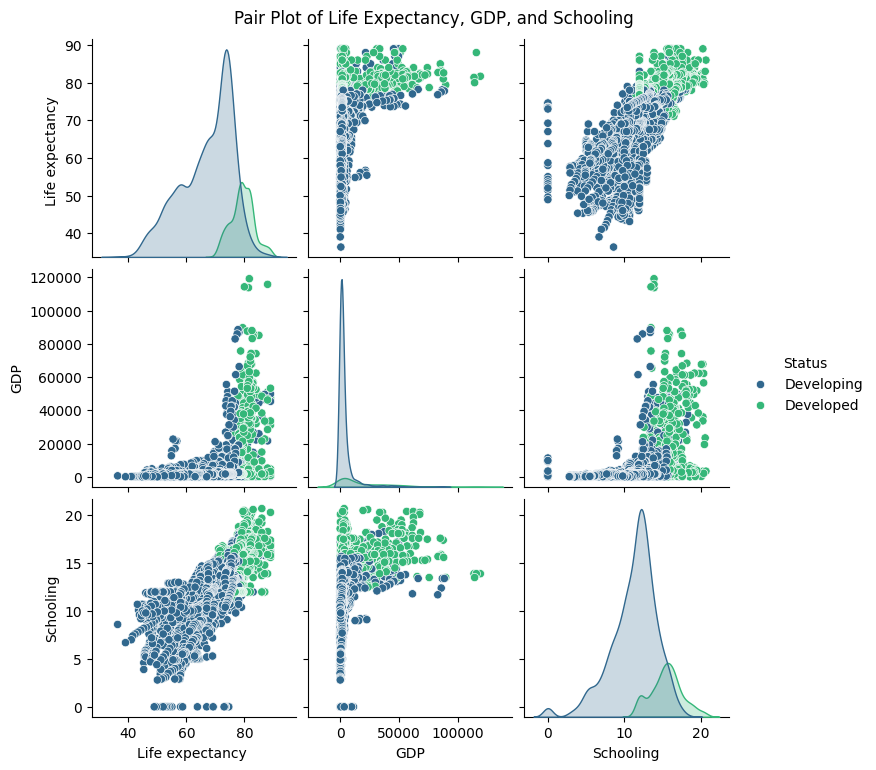

In [43]:

sns.pairplot(df, vars=['Life expectancy ','GDP', 'Schooling'], hue='Status', palette='viridis')
plt.suptitle('Pair Plot of Life Expectancy, GDP, and Schooling', y=1.02)
plt.show()


***Show the top and bottom 5 countries with the highest and lowest mean life expectancy respectively***

C:\Users\Student\AppData\Local\Temp\ipykernel_7124\1097134480.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Life expectancy ', y='Country', data=top_filtered_df, palette='viridis',ax=axes[0])
C:\Users\Student\AppData\Local\Temp\ipykernel_7124\1097134480.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Life expectancy ', y='Country', data=bottom_filtered_df, palette='Set2', scale='width',ax=axes[1])
C:\Users\Student\AppData\Local\Temp\ipykernel_7124\1097134480.py:16: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='Life expectancy ', y='Country', data=bottom_fil

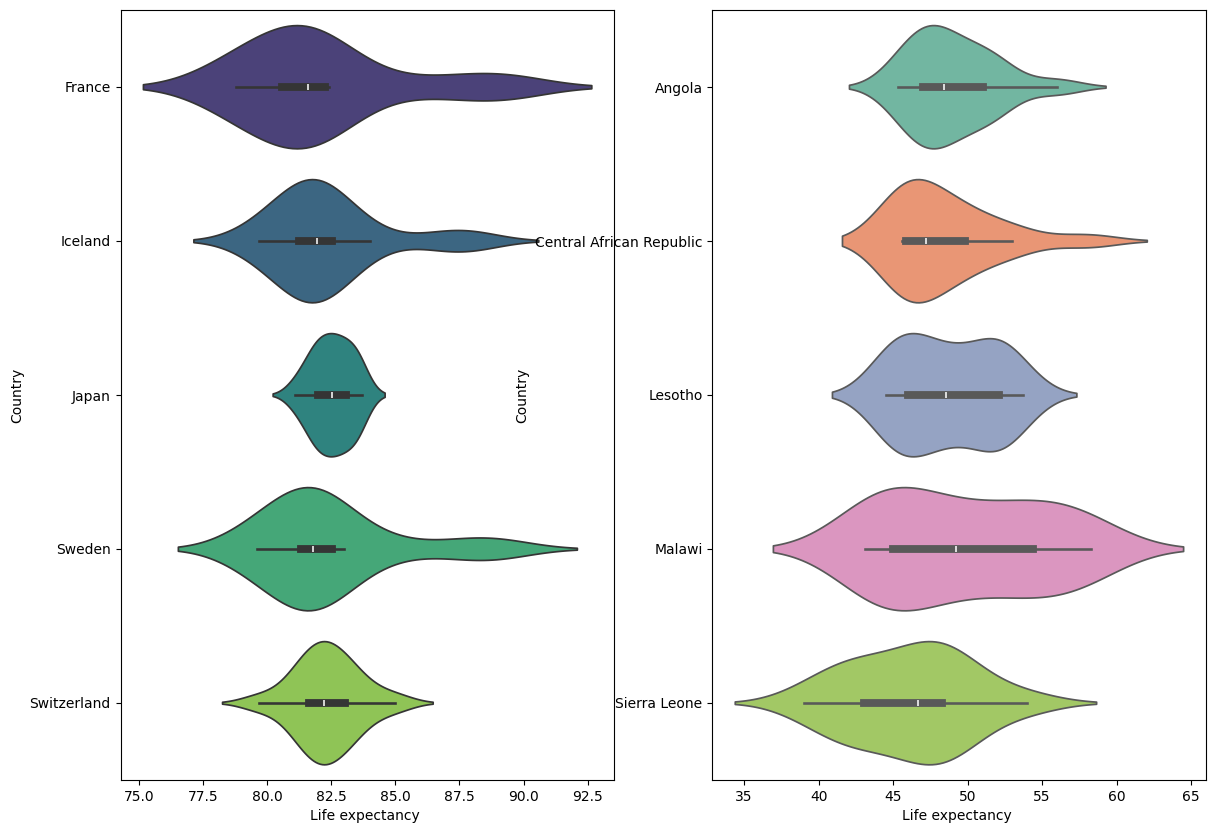

In [56]:

mean_life_expectancy = df.groupby('Country')['Life expectancy '].mean().sort_values()

top_countries = mean_life_expectancy.tail(5).index
bottom_countries=mean_life_expectancy.head(5).index

# Filter the dataset to include only the top 5 and bottom 5 countries
top_filtered_df= df[df['Country'].isin(top_countries)]
bottom_filtered_df= df[df['Country'].isin(bottom_countries)]


# Create a violin plot of life expectancy by country
fig, axes=plt.subplots(1,2,figsize=(14,10))

sns.violinplot(x='Life expectancy ', y='Country', data=top_filtered_df, palette='viridis',ax=axes[0])
sns.violinplot(x='Life expectancy ', y='Country', data=bottom_filtered_df, palette='Set2', scale='width',ax=axes[1])
plt.show()


***Task 5: APPLY PCA (Principal Component Analysis) TO REDUCE THE
DIMENTIONALITY OF A DATASET AND VISUALIZE THE RESULTS IN 2D/3D.***

In [23]:
df_standardized.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [26]:
from sklearn.decomposition import PCA
X = df_standardized.drop(columns=['Life expectancy '])
y=df_standardized['Life expectancy ']
feature_names=['Year', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


pca = PCA(n_components=13)  # Set the number of components you want to keep
X_pca = pca.fit_transform(X)
X_pca.shape

(1578, 13)

In [29]:
df_standardized.shape

(1578, 20)

In [28]:
# Get the principal component loadings
loadings = pca.components_

# Create a DataFrame for easy interpretation
loadings_df = pd.DataFrame(loadings, columns=feature_names, index=[f'PC{i+1}' for i in range(loadings.shape[0])])
#print("Principal Component Loadings:")
loadings_df.head()


,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
PC1,-0.001711,0.226478,0.211722,-0.228679,-0.182426,-0.226442,0.115976,-0.261100,0.229177,-0.275422,-0.134320,-0.282619,0.173634,-0.196744,0.016532,0.278955,0.284567,-0.349739,-0.329952
PC2,-0.003367,-0.109720,0.479944,0.123839,0.109698,-0.206537,0.440535,0.087733,0.464661,-0.129730,0.061146,-0.141636,-0.078422,0.103486,0.191411,-0.260656,-0.248482,0.159379,0.143823
PC3,0.027014,-0.036353,0.253897,-0.113524,-0.098597,0.450611,0.262246,-0.131457,0.235217,0.453117,-0.182378,0.450635,-0.086075,-0.015693,0.124760,0.229256,0.219130,0.012699,-0.028964
PC4,0.155407,0.118593,-0.001610,0.049571,0.586237,-0.036465,-0.017186,-0.126259,0.007334,-0.069916,-0.101740,-0.052321,0.159670,0.616760,0.027522,0.277200,0.282311,0.073912,0.106801
PC5,-0.313076,0.274610,0.057079,0.457009,0.094203,0.119511,0.055873,-0.177290,0.070984,0.134272,0.493720,0.136403,0.465388,-0.052987,-0.112798,-0.046066,-0.057823,-0.155170,-0.098257


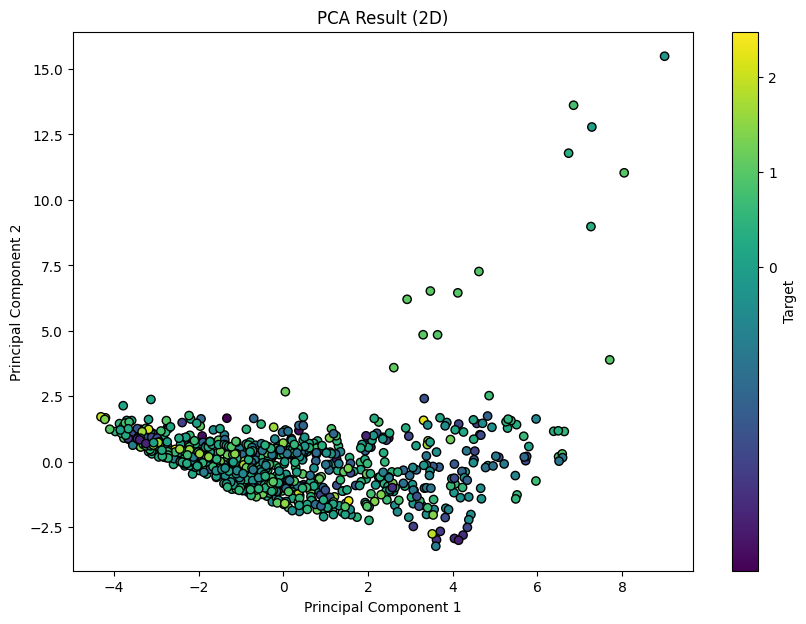

In [33]:
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])
df_pca['target'] = y
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['target'], cmap='viridis', edgecolor='k')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Target')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result (2D)')
plt.show()